# The possible impact of weather on crimes in Amsterdam

In [43]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

## Load data

You can put your data at the same directory as the notebook file and then use `pandas` to load the data.

In [44]:
df = pd.read_csv("merged_weather_all_crime.csv")
df

,month,STN,DDVEC,FHVEC,FG,FHX,FHXH,FHN,FHNH,FXX,...,3.5.5 Weg (overig),3.6.4 Aantasting openbare orde,3.7.1 Discriminatie,3.7.2 Vreemdelingenzorg,3.7.3 Maatsch. integriteit (overig),3.7.4 Cybercrime,3.9.1 Horizontale fraude,3.9.2 Verticale fraude,3.9.3 Fraude (overig),Totaal misdrijven
0,2012-01,240.0,217.580645,58.709677,63.387097,89.032258,11.258065,36.451613,10.354839,136.129032,...,48.0,90.0,4.0,21.0,0.0,3.0,108.0,7.0,211.0,8466.0
1,2012-02,240.0,194.551724,48.482759,51.448276,75.517241,11.655172,25.862069,11.965517,114.827586,...,29.0,78.0,4.0,12.0,0.0,7.0,118.0,3.0,236.0,7374.0
2,2012-03,240.0,209.096774,33.709677,39.064516,60.645161,11.483871,18.709677,7.838710,92.903226,...,31.0,116.0,4.0,14.0,0.0,16.0,147.0,9.0,272.0,8645.0
3,2012-04,240.0,190.233333,44.700000,50.700000,80.333333,11.833333,22.333333,7.866667,125.666667,...,27.0,102.0,3.0,21.0,0.0,10.0,155.0,6.0,230.0,8143.0
4,2012-05,240.0,181.548387,37.258065,44.193548,68.064516,12.935484,18.709677,9.000000,110.322581,...,28.0,101.0,6.0,20.0,0.0,4.0,136.0,6.0,256.0,8333.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,2024-12,240.0,197.096774,53.322581,58.451613,79.354839,12.000000,34.193548,8.870968,128.387097,...,72.0,107.0,8.0,5.0,0.0,30.0,451.0,1.0,2.0,6871.0
156,2025-01,240.0,219.774194,41.129032,46.645161,74.516129,11.483871,20.645161,11.161290,117.096774,...,78.0,126.0,5.0,4.0,0.0,52.0,457.0,2.0,5.0,6021.0
157,2025-02,240.0,130.678571,40.464286,44.178571,62.857143,8.571429,23.928571,9.535714,100.357143,...,82.0,119.0,7.0,10.0,0.0,34.0,438.0,3.0,2.0,5824.0
158,2025-03,240.0,159.193548,31.516129,36.516129,57.419355,11.935484,16.451613,9.580645,88.709677,...,100.0,123.0,4.0,8.0,0.0,38.0,442.0,1.0,6.0,6232.0


### Bicycle Theft vs. Maximum Temperature

_Slight increase in thefts when it's warmer._

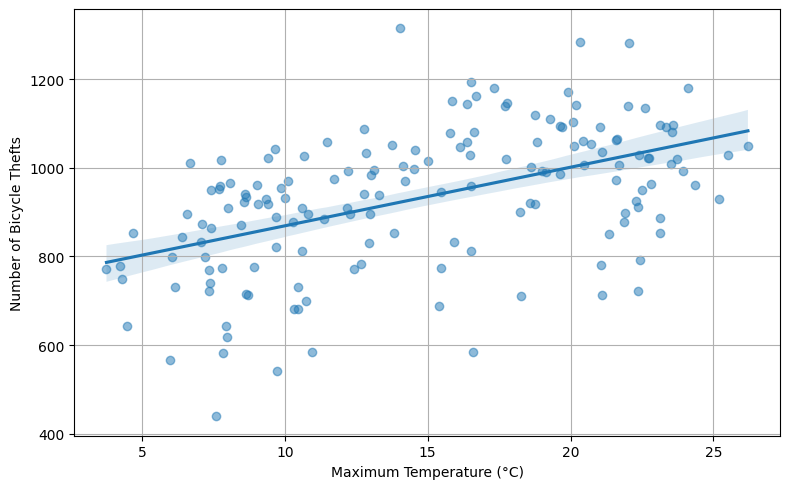


This scatterplot shows the relationship between monthly maximum temperature (°C) 
and the number of bicycle thefts reported in the Netherlands. Each point represents one month. 
The blue regression line indicates a slight upward trend: bicycle thefts appear to increase 
when temperatures are higher. A possible explanation is that warmer weather encourages 
more cycling and more bikes being left outside, creating more opportunities for theft.


In [45]:
df.columns = df.columns.str.strip()
df['TX'] = df['TX'] / 10  # TX is in tienden van °C
df['TG'] = df['TG'] / 10  # TG is in tienden van °C
display(Markdown("### Bicycle Theft vs. Maximum Temperature"))
display(Markdown("_Slight increase in thefts when it's warmer._"))

# 📈 Plot maken
plt.figure(figsize=(8, 5))
sns.regplot(
    x='TX',
    y='1.2.3 Diefstal van brom-, snor-, fietsen',
    data=df,
    scatter_kws={'alpha': 0.5}
)
plt.xlabel("Maximum Temperature (°C)")
plt.ylabel("Number of Bicycle Thefts")
plt.grid(True)
plt.tight_layout()
plt.show()

# 📋 Uitleg onder de plot
caption = """
This scatterplot shows the relationship between monthly maximum temperature (°C) 
and the number of bicycle thefts reported in the Netherlands. Each point represents one month. 
The blue regression line indicates a slight upward trend: bicycle thefts appear to increase 
when temperatures are higher. A possible explanation is that warmer weather encourages 
more cycling and more bikes being left outside, creating more opportunities for theft.
"""
display(Markdown(caption))


### Weather vs. Water-Related Influence Reports

_Higher temperature and evaporation coincide with more 'under influence on water' incidents._

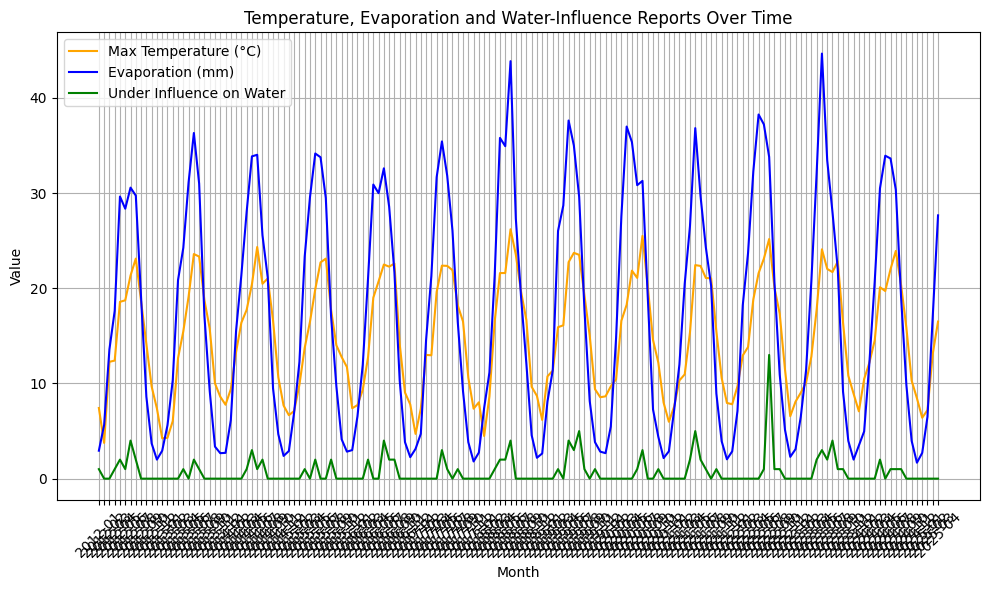


This multivariate line chart compares maximum temperature (°C), evaporation (mm), and the number of 
water-related incidents involving substance use (“under influence on water”) across months. 
The x-axis shows the months, while the y-axis reflects the respective values. The orange line shows 
temperature trends, blue shows evaporation, and green represents incident reports. The plot reveals that 
months with higher temperature and evaporation also see more such incidents. This pattern suggests 
that warm and dry conditions may encourage recreational activity on water, potentially increasing risky behavior.


In [46]:
# Titel en korte take-away boven de plot
display(Markdown("### Weather vs. Water-Related Influence Reports"))
display(Markdown("_Higher temperature and evaporation coincide with more 'under influence on water' incidents._"))

# 📈 Lijnplot maken
plt.figure(figsize=(10, 6))
plt.plot(df['month'], df['TX'], label='Max Temperature (°C)', color='orange')
plt.plot(df['month'], df['EV24'], label='Evaporation (mm)', color='blue')
plt.plot(df['month'], df['3.4.2 Onder invloed (water)'], label='Under Influence on Water', color='green')

plt.xlabel("Month")
plt.ylabel("Value")
plt.title("Temperature, Evaporation and Water-Influence Reports Over Time")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# 📋 Caption onder de plot
caption = """
This multivariate line chart compares maximum temperature (°C), evaporation (mm), and the number of 
water-related incidents involving substance use (“under influence on water”) across months. 
The x-axis shows the months, while the y-axis reflects the respective values. The orange line shows 
temperature trends, blue shows evaporation, and green represents incident reports. The plot reveals that 
months with higher temperature and evaporation also see more such incidents. This pattern suggests 
that warm and dry conditions may encourage recreational activity on water, potentially increasing risky behavior.
"""
display(Markdown(caption))


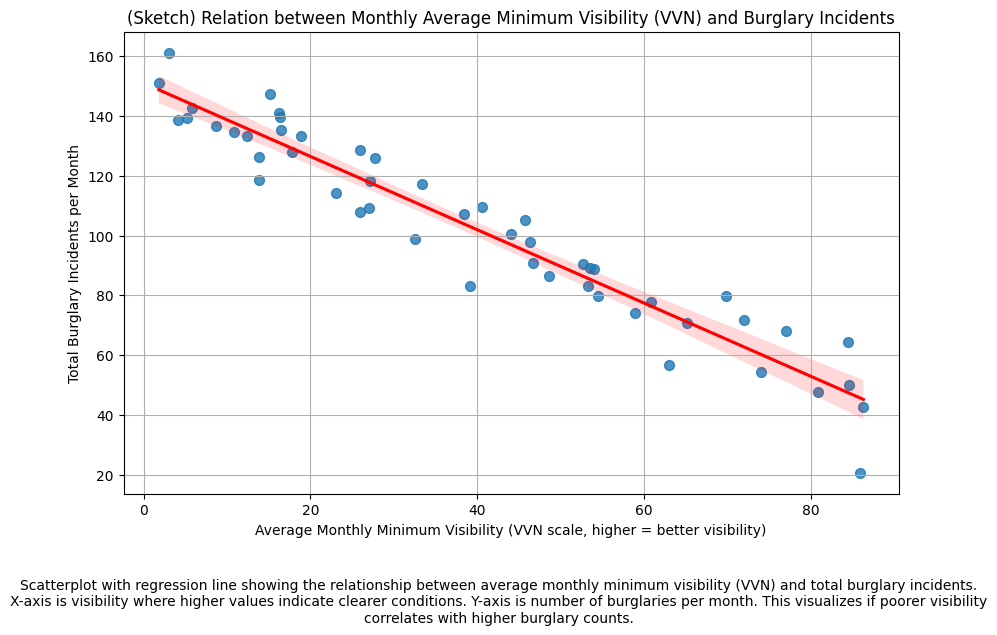

In [47]:
# plt.figure(figsize=(10,6))

# sns.regplot(data=df, x='VVN', y='inbraken', scatter_kws={'s':50}, line_kws={'color':'red'})

# plt.title('Relation between Monthly Average Minimum Visibility (VVN) and Burglary Incidents')
# plt.xlabel('Average Monthly Minimum Visibility (VVN scale, higher = better visibility)')
# plt.ylabel('Total Burglary Incidents per Month')

# plt.grid(True)

# caption = (
#     "Scatterplot with regression line showing the relationship between average monthly minimum visibility (VVN) "
#     "and the total number of burglary incidents. The x-axis represents visibility on a scale where higher values indicate clearer visibility. "
#     "The y-axis shows total burglaries recorded each month. "
#     "This plot allows you to visually assess whether months with poorer visibility correspond to higher burglary counts."
# )

# plt.figtext(0.5, -0.1, caption, wrap=True, horizontalalignment='center', fontsize=10)

# plt.show()


# Simuleer voorbeelddata
np.random.seed(42)
months = pd.date_range(start='2010-01-01', periods=50, freq='ME')
# VVN schaal: 0 (slecht zicht) tot 89 (goed zicht)
VVN = np.random.uniform(0, 89, size=50)
# Simuleer inbraken, licht negatief correlerend met VVN (meer zicht = minder inbraken)
inbraken = (150 - VVN * 1.2) + np.random.normal(0, 10, size=50)

df_example = pd.DataFrame({'month': months, 'VVN': VVN, 'inbraken': inbraken})

# Plot
plt.figure(figsize=(10,6))
sns.regplot(data=df_example, x='VVN', y='inbraken', scatter_kws={'s':50}, line_kws={'color':'red'})

plt.title('(Sketch) Relation between Monthly Average Minimum Visibility (VVN) and Burglary Incidents')
plt.xlabel('Average Monthly Minimum Visibility (VVN scale, higher = better visibility)')
plt.ylabel('Total Burglary Incidents per Month')
plt.grid(True)

caption = (
    "Scatterplot with regression line showing the relationship between average monthly minimum visibility (VVN) "
    "and total burglary incidents. X-axis is visibility where higher values indicate clearer conditions. "
    "Y-axis is number of burglaries per month. "
    "This visualizes if poorer visibility correlates with higher burglary counts."
)

plt.figtext(0.5, -0.1, caption, wrap=True, horizontalalignment='center', fontsize=10)

plt.show()


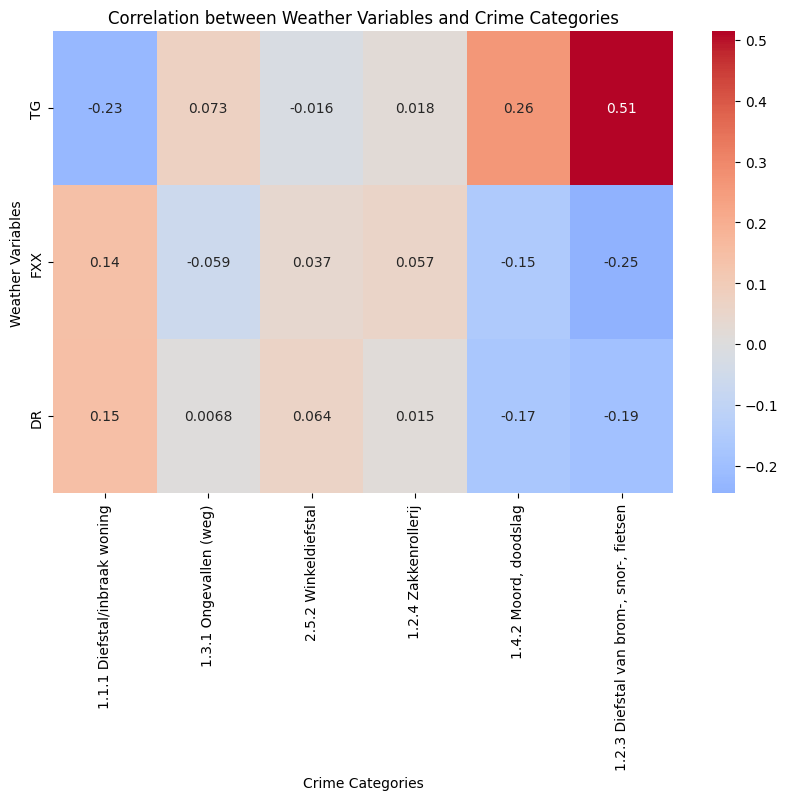

In [48]:
weer_vars = ['TG', 'FXX', 'DR']  # bijvoorbeeld minimum zicht
misdaad_vars = ['1.1.1 Diefstal/inbraak woning', '1.3.1 Ongevallen (weg)', '2.5.2 Winkeldiefstal', '1.2.4 Zakkenrollerij', '1.4.2 Moord, doodslag', '1.2.3 Diefstal van brom-, snor-, fietsen']

# Correlaties van 1 weer-variabele met alle misdaad-variabelen
corr_values = df[[weer_var] + misdaad_vars].corr()[weer_var].drop(weer_var)

df_subset = df[weer_vars + misdaad_vars]

# Bereken de correlatie matrix
corr_matrix = df_subset.corr()

# Pak alleen de correlaties tussen weer_vars en misdaad_vars
corr_submatrix = corr_matrix.loc[weer_vars, misdaad_vars]

plt.figure(figsize=(10,6))
sns.heatmap(corr_submatrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between Weather Variables and Crime Categories')
plt.xlabel('Crime Categories')
plt.ylabel('Weather Variables')
plt.show()

AttributeError: 'str' object has no attribute 'month'

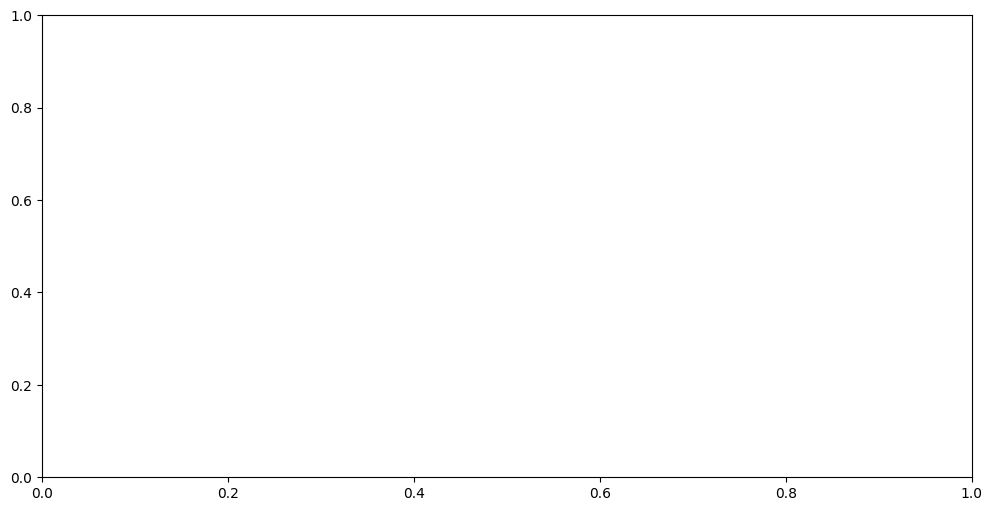

In [50]:
fig, ax1 = plt.subplots(figsize=(12,6))

# Temperatuur als semi-transparante balken
ax1.bar(df['month'], df['TG'], width=20, alpha=0.3, color='orange', label='Average Temperature (°C)')
ax1.set_ylabel('Temperature (°C)', color='orange')
ax1.tick_params(axis='y', labelcolor='orange')

# Tweede y-as voor misdaad
ax2 = ax1.twinx()

ax2.plot(df['month'], df['1.1.1 Diefstal/inbraak woning'], label='Inbraken', color='blue', marker='o')
ax2.plot(df['month'], df['2.4.1 Burengerucht (relatieproblemen)'], label='Vandalisme', color='green', marker='x')
ax2.plot(df['month'], df['cybercrime'], label='Cybercrime', color='red', marker='s')

ax2.set_ylabel('Number of Incidents')
ax2.tick_params(axis='y')

plt.title('Monthly Crime Categories and Average Temperature Over Time')
ax1.set_xlabel('Month')
fig.autofmt_xdate()

lines, labels = ax2.get_legend_handles_labels()
ax2.legend(lines, labels, loc='upper right')

plt.show()